# Clinical Trial Analysis

### Disease phenotype:

- Increase in Left Ventrical Size 
-- measured by left ventricular end-diastolic dimension (LVEDD)
- Elevated Heart Rate
- Reduced Ejection Fraction (EF)

### Experimental Design:

- 4 week clincal trial
- 20 patients (50/50 Placebo/Treatment)
- Measurements taken before the trial (pretreatment), 2 weeks in (2 weeks), 4 weeks in (4 weeks), and a 18 month follow up.

### Measurements 

- Heart Rate
- LVEDD
- Ejection Fraction -- Surogate Marker 
- Minnesota Living with Heart Failure Questionnaire (MLHFQ) -- Quality of Life

### Primary Endpoints 

- Survival Rate (18M)
- Decrease in LVEDD


In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [17]:
df = pd.read_csv('data/vis_data.csv')
df.head()

,PatientID,Treatment,HRPre,HR2W,HR4W,HR18M,mortality _treatement_period,Mortality18M,EFPre,EF2W,EF4W,EF18M,QoLPre,QoL2W,QoL4W,QoL18M,AdjPreLVSize,AdjLVSize2W,AdjLVSize4W,AdjLVSize18M
0,1,0,82.0,85.0,89.0,Dead,1.0,0.0,0.25,0.25,0.24,Dead,72.0,69.0,68.0,Dead,7.1,7.0,7.2,7.1
1,2,0,89.0,87.0,61.0,Dead,1.0,0.0,0.27,0.28,0.27,Dead,51.0,55.0,56.0,Dead,7.1,7.2,6.9,7.0
2,3,0,95.0,94.0,91.0,Dead,1.0,0.0,0.21,0.22,0.22,Dead,64.0,62.0,66.0,Dead,6.1,6.1,5.8,5.9
3,4,1,105.0,82.0,79.0,Dead,1.0,0.0,0.17,0.21,0.24,Dead,67.0,45.0,39.0,Dead,6.0,5.5,4.7,4.4
4,5,1,100.0,81.0,72.0,65,1.0,1.0,0.22,0.33,0.45,0.49,62.0,49.0,32.0,24,6.0,5.4,4.5,4.1


In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

def plot_measurements_over_time(df, columns, treatment_column='Treatment', treatment_labels=['Placebo', 'Treatment']):
    # Calculate the average measurement for each treatment group and measurement time
    measurement_df = df.groupby([treatment_column]).agg({
        columns[0]: 'mean',
        columns[1]: 'mean',
        columns[2]: 'mean'
    }).reset_index()

    measurement_df[treatment_column] = measurement_df[treatment_column].replace({0: treatment_labels[0], 1: treatment_labels[1]})

    # Display the new dataframe
    print(measurement_df)

    # Perform a t-test on the second measurement time
    t_stat, p_value = stats.ttest_ind(df[(df[treatment_column] == 0)][columns[1]], df[(df[treatment_column] == 1)][columns[1]])
    print(f"{columns[1]} t-statistic: {round(t_stat, 3)}, p-value: {round(p_value, 5)}")

    # Perform a t-test on the third measurement time
    t_stat, p_value = stats.ttest_ind(df[(df[treatment_column] == 0)][columns[2]], df[(df[treatment_column] == 1)][columns[2]])
    print(f"{columns[2]} t-statistic: {round(t_stat, 3)}, p-value: {round(p_value, 5)}")

    # Melt the dataframe to create a "long" format for seaborn
    measurement_melted = measurement_df.melt(id_vars=treatment_column, var_name='Time', value_name='Measurement')

    # create the plot
    sns.set_style('darkgrid')
    sns.set_palette('Set2')
    fig, ax = plt.subplots(figsize=(9, 6))
    sns.lineplot(data=measurement_melted, x='Time', y='Measurement', hue=treatment_column, marker='o', ax=ax)

    # set the title font size
    ax.set_title(f'Average {columns[0]} Over Time by Treatment Group', fontsize=18, fontweight='bold', pad=20)

    # set the x and y axis labels and font size
    ax.set_xlabel('Measurement Time', fontsize=14, fontweight='bold', labelpad=15)
    ax.set_ylabel(columns[0], fontsize=14, fontweight='bold', labelpad=15)

    # set the legend title and font size
    ax.legend(title=treatment_column, fontsize=12)

    # set the tick label font size
    ax.tick_params(axis='both', which='major', labelsize=12)

    plt.show()

   Treatment  AdjPreLVSize  AdjLVSize2W  AdjLVSize4W
0    Placebo          6.61         6.55         6.47
1  Treatment          6.58         6.09         5.35
AdjLVSize2W t-statistic: 2.136, p-value: 0.04667
AdjLVSize4W t-statistic: 4.425, p-value: 0.00033


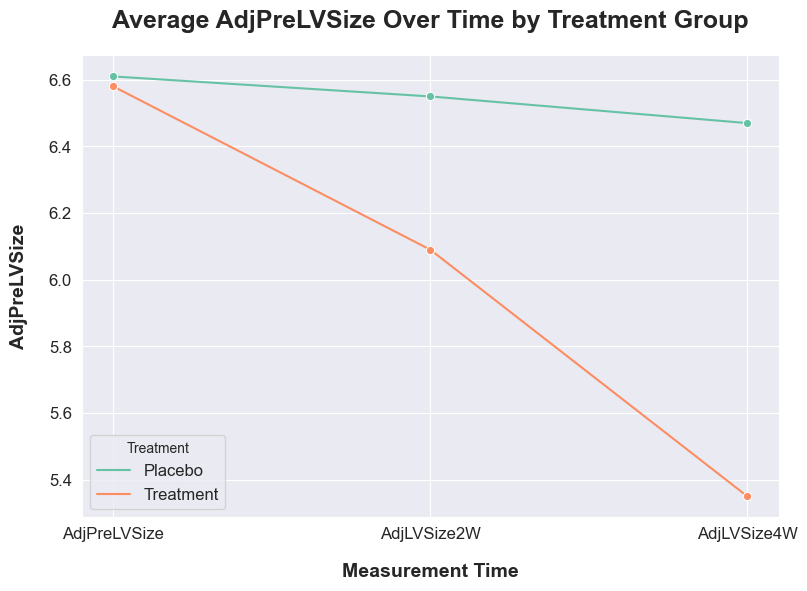

In [19]:
plot_measurements_over_time(df, ['AdjPreLVSize', 'AdjLVSize2W', 'AdjLVSize4W'])

In [20]:
df.columns

Index(['PatientID', 'Treatment', 'HRPre', 'HR2W', 'HR4W', 'HR18M',
       'mortality _treatement_period', 'Mortality18M', 'EFPre', 'EF2W', 'EF4W',
       'EF18M', 'QoLPre', 'QoL2W', 'QoL4W', 'QoL18M', 'AdjPreLVSize',
       'AdjLVSize2W', 'AdjLVSize4W', 'AdjLVSize18M'],
      dtype='object')

In [21]:
# Calculate the average left ventricular size for each treatment group and measurement time
hr_df = df.groupby(['Treatment']).agg({
    'HRPre': 'mean',
    'HR2W': 'mean',
    'HR4W': 'mean'
}).reset_index()

hr_df['Treatment'] = hr_df['Treatment'].replace({0: 'Placebo', 1: "Treatment"})

# Display the new dataframe
print(hr_df)

   Treatment  HRPre  HR2W  HR4W
0    Placebo   89.6  89.0  83.4
1  Treatment   91.4  79.4  71.0


In [22]:
from scipy import stats

# Split the data into the placebo and experimental groups
placebo = df.loc[df['Treatment'] == 0]
experimental = df.loc[df['Treatment'] == 1]

# Perform a t-test on HR2W
t_stat, p_value = stats.ttest_ind(placebo['HR2W'], experimental['HR2W'])
print(f"HR2W t-statistic: {t_stat}, p-value: {p_value}")

# Perform a t-test on HR4W
t_stat, p_value = stats.ttest_ind(placebo['HR4W'], experimental['HR4W'])
print(f"HR4W t-statistic: {t_stat}, p-value: {p_value}")

HR2W t-statistic: 2.935720331594385, p-value: 0.008835800530568835
HR4W t-statistic: 2.433712883134466, p-value: 0.025589281604537793


HR2W t-statistic: 2.935720331594385, p-value: 0.008835800530568835
HR4W t-statistic: 2.433712883134466, p-value: 0.025589281604537793


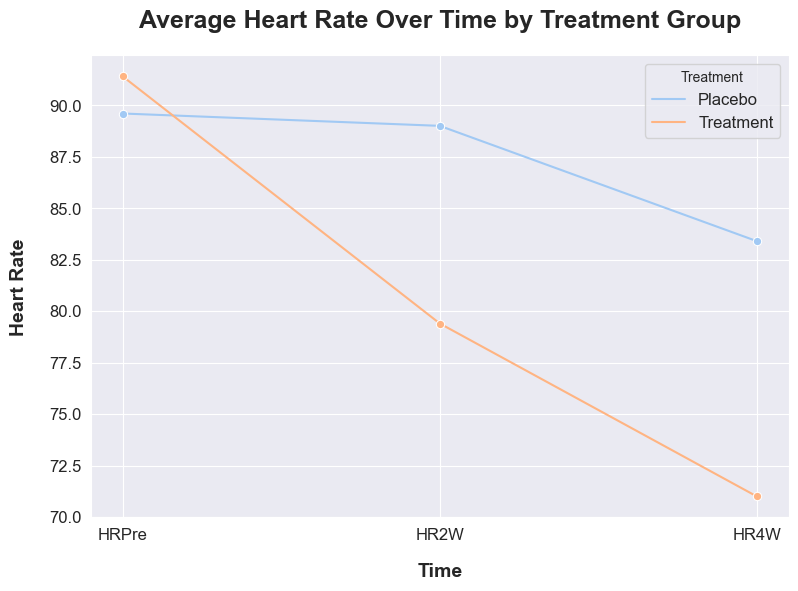

In [23]:
# Perform a t-test on HR2W
t_stat, p_value = stats.ttest_ind(placebo['HR2W'], experimental['HR2W'])
print(f"HR2W t-statistic: {t_stat}, p-value: {p_value}")

# Perform a t-test on HR4W
t_stat, p_value = stats.ttest_ind(placebo['HR4W'], experimental['HR4W'])
print(f"HR4W t-statistic: {t_stat}, p-value: {p_value}")

# Melt the dataframe to create a "long" format for seaborn
hr_melted = hr_df.melt(id_vars='Treatment', var_name='Time', value_name='Heart Rate')

# create the plot
sns.set_style('darkgrid')
sns.set_palette('pastel')
fig, ax = plt.subplots(figsize=(9, 6))
sns.lineplot(data=hr_melted, x='Time', y='Heart Rate', hue='Treatment', marker='o', ax=ax)

# set the title font size
ax.set_title('Average Heart Rate Over Time by Treatment Group', fontsize=18, fontweight='bold', pad=20)

# set the x and y axis labels and font size
ax.set_xlabel('Time', fontsize=14,fontweight='bold', labelpad=15)
ax.set_ylabel('Heart Rate', fontsize=14, fontweight='bold', labelpad=15)

# set the legend title and font size
ax.legend(title='Treatment', fontsize=12)

# set the tick label font size
ax.tick_params(axis='both', which='major', labelsize=12)

plt.show()

In [24]:
# Calculate the average left ventricular size for each treatment group and measurement time
hs_df = df.groupby(['Treatment']).agg({
    'AdjPreLVSize': 'mean',
    'AdjLVSize2W': 'mean',
    'AdjLVSize4W': 'mean'
}).reset_index()

hs_df['Treatment'] = hs_df['Treatment'].replace({0: 'Placebo', 1: "Treatment"})

# Display the new dataframe
print(hs_df)

   Treatment  AdjPreLVSize  AdjLVSize2W  AdjLVSize4W
0    Placebo          6.61         6.55         6.47
1  Treatment          6.58         6.09         5.35


AdjLVSize2W t-statistic: 2.1360079464488804, p-value: 0.04666819646102995
AdjLVSize4W t-statistic: 4.424884696640582, p-value: 0.000326969643860699


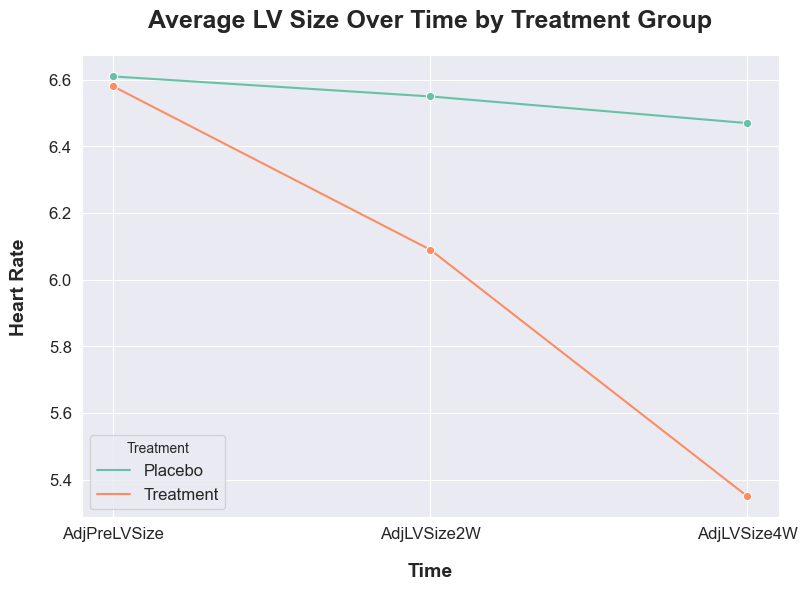

In [25]:
# Perform a t-test on HR2W
t_stat, p_value = stats.ttest_ind(placebo['AdjLVSize2W'], experimental['AdjLVSize2W'])
print(f"AdjLVSize2W t-statistic: {t_stat}, p-value: {p_value}")

# Perform a t-test on HR4W
t_stat, p_value = stats.ttest_ind(placebo['AdjLVSize4W'], experimental['AdjLVSize4W'])
print(f"AdjLVSize4W t-statistic: {t_stat}, p-value: {p_value}")

# Melt the dataframe to create a "long" format for seaborn
hs_melted = hs_df.melt(id_vars='Treatment', var_name='Time', value_name='LV Size')

# create the plot
sns.set_style('darkgrid')
sns.set_palette('Set2')
fig, ax = plt.subplots(figsize=(9, 6))
sns.lineplot(data=hs_melted, x='Time', y='LV Size', hue='Treatment', marker='o', ax=ax)

# set the title font size
ax.set_title('Average LV Size Over Time by Treatment Group', fontsize=18, fontweight='bold', pad=20)

# set the x and y axis labels and font size
ax.set_xlabel('Time', fontsize=14,fontweight='bold', labelpad=15)
ax.set_ylabel('Heart Rate', fontsize=14, fontweight='bold', labelpad=15)

# set the legend title and font size
ax.legend(title='Treatment', fontsize=12)

# set the tick label font size
ax.tick_params(axis='both', which='major', labelsize=12)

plt.show()

In [26]:
df.columns

Index(['PatientID', 'Treatment', 'HRPre', 'HR2W', 'HR4W', 'HR18M',
       'mortality _treatement_period', 'Mortality18M', 'EFPre', 'EF2W', 'EF4W',
       'EF18M', 'QoLPre', 'QoL2W', 'QoL4W', 'QoL18M', 'AdjPreLVSize',
       'AdjLVSize2W', 'AdjLVSize4W', 'AdjLVSize18M'],
      dtype='object')

In [27]:
# Calculate the average left ventricular size for each treatment group and measurement time
ef_df = df.groupby(['Treatment']).agg({
    'EFPre': 'mean',
    'EF2W': 'mean',
    'EF4W': 'mean'
}).reset_index()

ef_df['Treatment'] = ef_df['Treatment'].replace({0: 'Placebo', 1: "Treatment"})

# Display the new dataframe
print(ef_df)

   Treatment  EFPre   EF2W   EF4W
0    Placebo  0.267  0.276  0.270
1  Treatment  0.250  0.321  0.398


EF2W t-statistic: -1.6452407632826251, p-value: 0.11726977020141689
EF2W t-statistic: -3.6923076923076925, p-value: 0.0016669736019993017


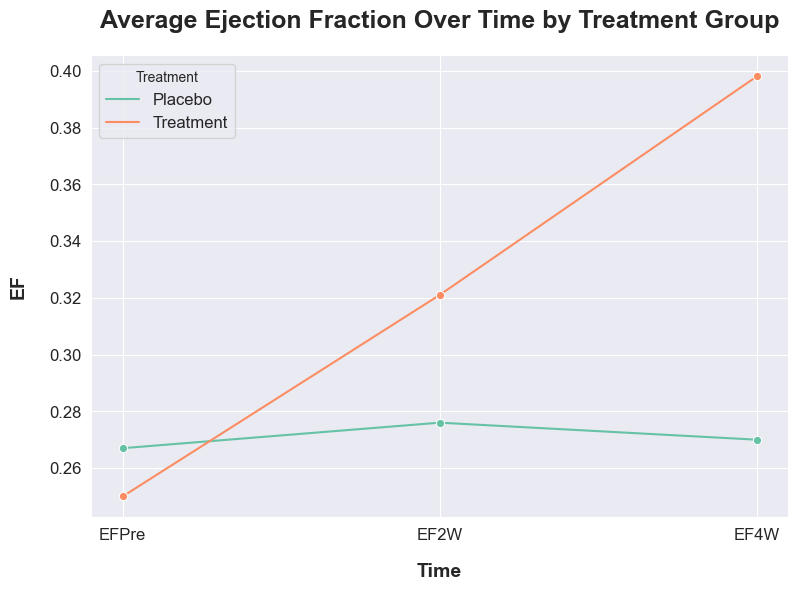

In [45]:
# Split the data into the placebo and experimental groups
placebo = df.loc[df['Treatment'] == 0]
experimental = df.loc[df['Treatment'] == 1]

# Perform a t-test on HR2W
t_stat, p_value = stats.ttest_ind(placebo['EF2W'], experimental['EF2W'])
print(f"EF2W t-statistic: {t_stat}, p-value: {p_value}")

# Perform a t-test on HR4W
t_stat, p_value = stats.ttest_ind(placebo['EF4W'], experimental['EF4W'])
print(f"EF2W t-statistic: {t_stat}, p-value: {p_value}")

# Melt the dataframe to create a "long" format for seaborn
ef_melted = ef_df.melt(id_vars='Treatment', var_name='Time', value_name='Ejection Fraction')

# create the plot
sns.set_style('darkgrid')
sns.set_palette('Set2')
fig, ax = plt.subplots(figsize=(9, 6))
sns.lineplot(data=ef_melted, x='Time', y='Ejection Fraction', hue='Treatment', marker='o', ax=ax)

# set the title font size
ax.set_title('Average Ejection Fraction Over Time by Treatment Group', fontsize=18, fontweight='bold', pad=20)

# set the x and y axis labels and font size
ax.set_xlabel('Time', fontsize=14,fontweight='bold', labelpad=15)
ax.set_ylabel('EF', fontsize=14, fontweight='bold', labelpad=15)

# set the legend title and font size
ax.legend(title='Treatment', fontsize=12)

# set the tick label font size
ax.tick_params(axis='both', which='major', labelsize=12)

plt.show()

In [29]:
# Calculate the average left ventricular size for each treatment group and measurement time
ql_df = df.groupby(['Treatment']).agg({
    'QoLPre': 'mean',
    'QoL2W': 'mean',
    'QoL4W': 'mean'
}).reset_index()

ql_df['Treatment'] = ql_df['Treatment'].replace({0: 'Placebo', 1: "Treatment"})

# Display the new dataframe
print(ql_df)

   Treatment  QoLPre  QoL2W  QoL4W
0    Placebo    65.2   62.6   62.0
1  Treatment    69.9   52.7   44.8


QoL2W t-statistic: 1.285425247485328, p-value: 0.21493677873044878
QoL4W t-statistic: 2.121894216245255, p-value: 0.04798334530882063


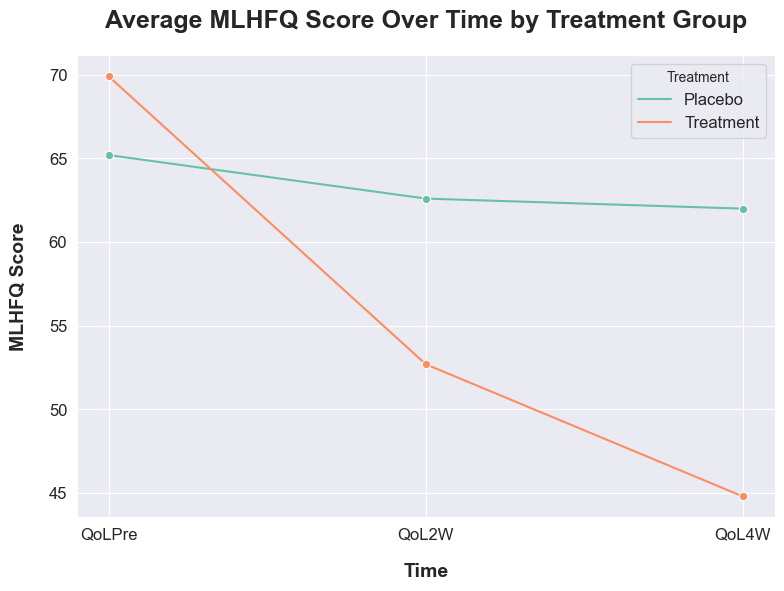

In [30]:
# Perform a t-test on HR2W
t_stat, p_value = stats.ttest_ind(placebo['QoL2W'], experimental['QoL2W'])
print(f"QoL2W t-statistic: {t_stat}, p-value: {p_value}")

# Perform a t-test on HR4W
t_stat, p_value = stats.ttest_ind(placebo['QoL4W'], experimental['QoL4W'])
print(f"QoL4W t-statistic: {t_stat}, p-value: {p_value}")

# Melt the dataframe to create a "long" format for seaborn
ql_melted = ql_df.melt(id_vars='Treatment', var_name='Time', value_name='Ejection Fraction')

# create the plot
sns.set_style('darkgrid')
sns.set_palette('Set2')
fig, ax = plt.subplots(figsize=(9, 6))
sns.lineplot(data=ql_melted, x='Time', y='Ejection Fraction', hue='Treatment', marker='o', ax=ax)

# set the title font size
ax.set_title('Average MLHFQ Score Over Time by Treatment Group', fontsize=18, fontweight='bold', pad=20)

# set the x and y axis labels and font size
ax.set_xlabel('Time', fontsize=14,fontweight='bold', labelpad=15)
ax.set_ylabel('MLHFQ Score', fontsize=14, fontweight='bold', labelpad=15)

# set the legend title and font size
ax.legend(title='Treatment', fontsize=12)

# set the tick label font size
ax.tick_params(axis='both', which='major', labelsize=12)

plt.show()

## 3D Plots
Axes
- Heart Rate
- LV Size
- Ejection Fraction

Color: Treatment Group

Indicator Shape: Mortality 18 Months

In [31]:
df.columns

Index(['PatientID', 'Treatment', 'HRPre', 'HR2W', 'HR4W', 'HR18M',
       'mortality _treatement_period', 'Mortality18M', 'EFPre', 'EF2W', 'EF4W',
       'EF18M', 'QoLPre', 'QoL2W', 'QoL4W', 'QoL18M', 'AdjPreLVSize',
       'AdjLVSize2W', 'AdjLVSize4W', 'AdjLVSize18M'],
      dtype='object')

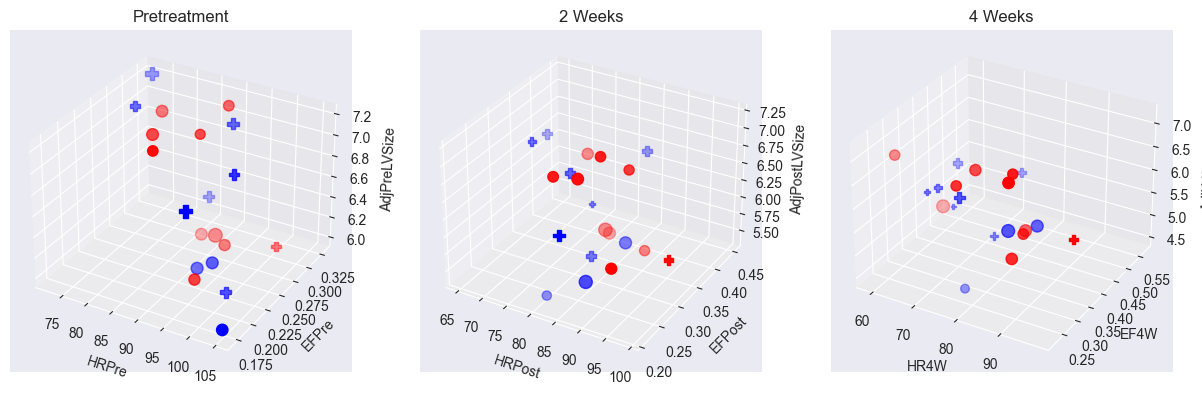

In [32]:
fig, axs = plt.subplots(1, 3, figsize=(15,5), subplot_kw={'projection': '3d'})

x = df['HRPre']
y = df['EFPre']
z = df['AdjPreLVSize']
c = np.where(df['Treatment']==1,'b','r')
s = df['QoLPre']
marker = df['Mortality18M']
for m in np.unique(marker):
    axs[0].scatter(x[marker==m], y[marker==m], z[marker==m], c=c[marker==m], s=s[marker==m], marker = 'o' if m==0 else 'P')


axs[0].set_xlabel('HRPre')
axs[0].set_ylabel('EFPre')
axs[0].set_zlabel('AdjPreLVSize')
axs[0].set_title('Pretreatment')

x = df['HR2W']
y = df['EF2W']
z = df['AdjLVSize2W']
c = np.where(df['Treatment']==1,'b','r')
s = df['QoL2W']
marker = df['Mortality18M']
for m in np.unique(marker):
    axs[1].scatter(x[marker==m], y[marker==m], z[marker==m], c=c[marker==m], s=s[marker==m], marker = 'o' if m==0 else 'P')


axs[1].set_xlabel('HRPost')
axs[1].set_ylabel('EFPost')
axs[1].set_zlabel('AdjPostLVSize')
axs[1].set_title('2 Weeks')

x = df['HR4W']
y = df['EF4W']
z = df['AdjLVSize4W']
c = np.where(df['Treatment']==1,'b','r')
s = df['QoL4W']
marker = df['Mortality18M']
for m in np.unique(marker):
    axs[2].scatter(x[marker==m], y[marker==m], z[marker==m], c=c[marker==m], s=s[marker==m], marker = 'o' if m==0 else 'P')

axs[2].set_xlabel('HR4W')
axs[2].set_ylabel('EF4W')
axs[2].set_zlabel('AdjLVSize4W')
axs[2].set_title('4 Weeks')

plt.show()

### Linear Regression

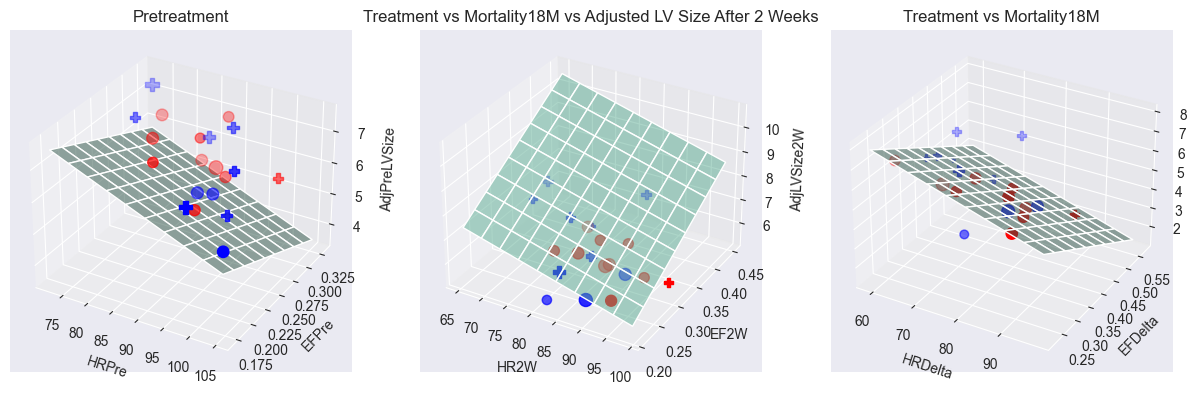

In [33]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from sklearn.linear_model import LinearRegression

df = pd.read_csv('data/vis_data.csv')

fig, axs = plt.subplots(1, 3, figsize=(15,5), subplot_kw={'projection': '3d'})

x = df['HRPre']
y = df['EFPre']
z = df['AdjPreLVSize']
c = np.where(df['Treatment']==1,'b','r')
s = df['QoLPre']
marker = df['Mortality18M']
for m in np.unique(marker):
    axs[0].scatter(x[marker==m], y[marker==m], z[marker==m], c=c[marker==m], s=s[marker==m], marker = 'o' if m==0 else 'P')

# Add a regression plane
model = LinearRegression()
model.fit(df[['HRPre', 'EFPre', 'AdjPreLVSize']], marker)
coef = model.coef_
intercept = model.intercept_

xx, yy = np.meshgrid(np.linspace(x.min(), x.max(), 10), np.linspace(y.min(), y.max(), 10))
zz = -(coef[0] * xx + coef[1] * yy + intercept) / coef[2]
axs[0].plot_surface(xx, yy, zz, alpha=0.5)

axs[0].set_xlabel('HRPre')
axs[0].set_ylabel('EFPre')
axs[0].set_zlabel('AdjPreLVSize')
axs[0].set_title('Pretreatment')

x = df['HR2W']
y = df['EF2W']
z = df['AdjLVSize2W']
c = np.where(df['Treatment']==1,'b','r')
s = df['QoL2W']
marker = df['Mortality18M']
for m in np.unique(marker):
    axs[1].scatter(x[marker==m], y[marker==m], z[marker==m], c=c[marker==m], s=s[marker==m], marker = 'o' if m==0 else 'P')

# regression plane for the second subplot
model = LinearRegression()
model.fit(df[['HR2W', 'EF2W', 'AdjLVSize2W']], marker)
coef = model.coef_
intercept = model.intercept_

xx, yy = np.meshgrid(np.linspace(x.min(), x.max(), 10), np.linspace(y.min(), y.max(), 10))
zz = -(coef[0] * xx + coef[1] * yy + intercept) / coef[2]
axs[1].plot_surface(xx, yy, zz, alpha=0.5)

axs[1].set_xlabel('HR2W')
axs[1].set_ylabel('EF2W')
axs[1].set_zlabel('AdjLVSize2W')
axs[1].set_title('Treatment vs Mortality18M vs Adjusted LV Size After 2 Weeks')

x = df['HR4W']
y = df['EF4W']
z = df['AdjLVSize4W']
c = np.where(df['Treatment']==1,'b','r')
s = df['QoL4W']
marker = df['Mortality18M']
for m in np.unique(marker):
    axs[2].scatter(x[marker==m], y[marker==m], z[marker==m], c=c[marker==m], s=s[marker==m], marker = 'o' if m==0 else 'P')

# Add a regression plane
model = LinearRegression()
model.fit(df[['HRPre', 'EFPre', 'AdjPreLVSize']], marker)
coef = model.coef_
intercept = model.intercept_

xx, yy = np.meshgrid(np.linspace(x.min(), x.max(), 10), np.linspace(y.min(), y.max(), 10))
zz = -(coef[0] * xx + coef[1] * yy + intercept) / coef[2]
axs[2].plot_surface(xx, yy, zz, alpha=0.5)

axs[2].set_xlabel('HRDelta')
axs[2].set_ylabel('EFDelta')
axs[2].set_zlabel('AdjDeltaLVSize')
axs[2].set_title('Treatment vs Mortality18M')

plt.show()

### Logistic Regression

/Users/nick/opt/anaconda3/envs/Torch_SB2/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


NameError: name 'sp' is not defined

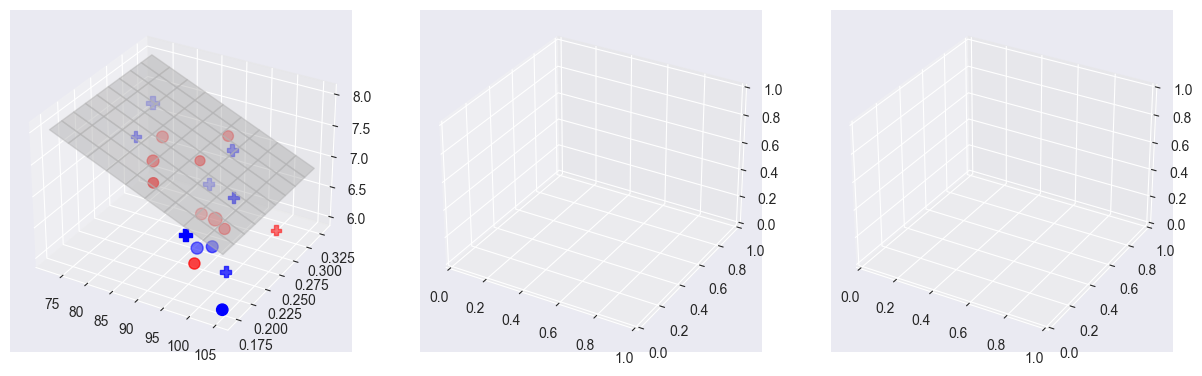

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

# Create 3D figure with subplots
fig, axs = plt.subplots(1, 3, figsize=(15,5), subplot_kw={'projection': '3d'})

# Plot the first subplot
x = df['HRPre']
y = df['EFPre']
z = df['AdjPreLVSize']
c = np.where(df['Treatment']==1,'b','r')
s = df['QoLPre']
marker = df['Mortality18M']
for m in np.unique(marker):
    axs[0].scatter(x[marker==m], y[marker==m], z[marker==m], c=c[marker==m], s=s[marker==m], marker = 'o' if m==0 else 'P')

# Add a regression plane to the first subplot
# fit logistic regression model
model = LogisticRegression(fit_intercept=True)
model.fit(df[['HRPre', 'EFPre', 'AdjPreLVSize']], marker)

# create meshgrid for surface plot
xx, yy = np.meshgrid(np.linspace(x.min(), x.max(), 10), np.linspace(y.min(), y.max(), 10))
zz = -(model.intercept_ + model.coef_[0][0] * xx + model.coef_[0][1] * yy) / model.coef_[0][2]
probas = model.predict_proba(np.column_stack((xx.ravel(), yy.ravel(), zz.ravel())))
probas = probas[:, 1].reshape(xx.shape)

# add surface plot to subplot
axs[0].plot_surface(xx, yy, zz, alpha=0.5, facecolors=plt.cm.RdBu(probas))

# add deviance to the first subplot
residuals = sp.deviance_residuals(model, df[['HRPre', 'EFPre', 'AdjPreLVSize']], marker)
axs[0].scatter(x, y, z, c=residuals, cmap='coolwarm', alpha=0.5)

# Set labels and title for the first subplot
axs[0].set_xlabel('HRPre')
axs[0].set_ylabel('EFPre')
axs[0].set_zlabel('AdjPreLVSize')
axs[0].set_title('Pretreatment')

# Plot the second subplot
x = df['HR2W']
y = df['EF2W']
z = df['AdjLVSize2W']
c = np.where(df['Treatment']==1,'b','r')
s = df['QoL2W']
marker = df['Mortality18M']
for m in np.unique(marker):
    axs[1].scatter(x[marker==m], y[marker==m], z[marker==m], c=c[marker==m], s=s[marker==m], marker = 'o' if m==0 else 'P')


# fit logistic regression model
model = LogisticRegression(fit_intercept=True)
model.fit(df[['HR2W', 'EF2W', 'AdjLVSize2W']], marker)

# create meshgrid for surface plot
xx, yy = np.meshgrid(np.linspace(x.min(), x.max(), 10), np.linspace(y.min(), y.max(), 10))
zz = -(model.intercept_ + model.coef_[0][0] * xx + model.coef_[0][1] * yy) / model.coef_[0][2]
probas = model.predict_proba(np.column_stack((xx.ravel(), yy.ravel(), zz.ravel())))
probas = probas[:, 1].reshape(xx.shape)

# add surface plot to subplot
axs[1].plot_surface(xx, yy, zz, alpha=0.5, facecolors=plt.cm.RdBu(probas))


# Set labels and title for the second subplot
axs[1].set_xlabel('HR2W')
axs[1].set_ylabel('EF2W')
axs[1].set_zlabel('AdjLVSize2W')
axs[1].set_title('2 Weeks')

# Plot the third subplot
x = df['HR4W']
y = df['EF4W']
z = df['AdjLVSize4W']
c = np.where(df['Treatment']==1,'b','r')
s = df['QoL2W']
marker = df['Mortality18M']
for m in np.unique(marker):
    axs[2].scatter(x[marker==m], y[marker==m], z[marker==m], c=c[marker==m], s=s[marker==m], marker = 'o' if m==0 else 'P')

# fit logistic regression model
model = LogisticRegression(fit_intercept=True)
model.fit(df[['HR4W', 'EF4W', 'AdjLVSize4W']], marker)

# create meshgrid for surface plot
xx, yy = np.meshgrid(np.linspace(x.min(), x.max(), 10), np.linspace(y.min(), y.max(), 10))
zz = -(model.intercept_ + model.coef_[0][0] * xx + model.coef_[0][1] * yy) / model.coef_[0][2]
probas = model.predict_proba(np.column_stack((xx.ravel(), yy.ravel(), zz.ravel())))
probas = probas[:, 1].reshape(xx.shape)

# add surface plot to subplot
axs[2].plot_surface(xx, yy, zz, alpha=0.5, facecolors=plt.cm.RdBu(probas))

axs[2].set_xlabel('HR4W')
axs[2].set_ylabel('EF4W')
axs[2].set_zlabel('AdjLVSize4W')
axs[2].set_title('4 Weeks')

plt.show()

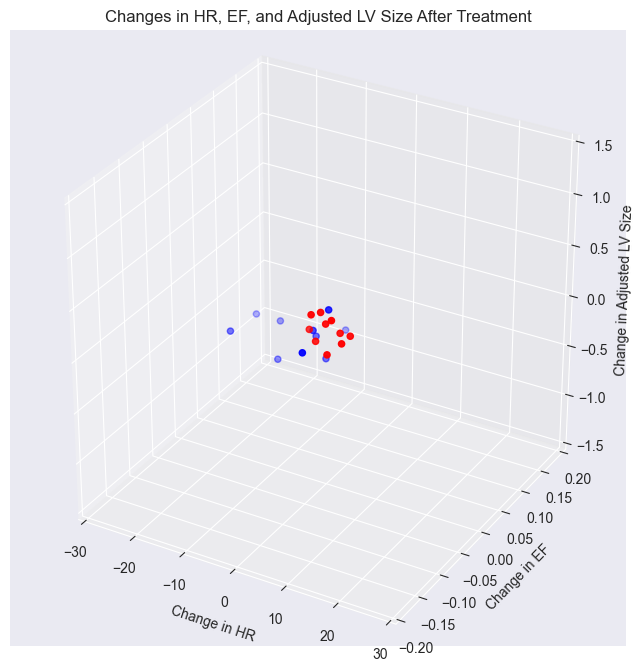

In [35]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

df = pd.read_csv('data/vis_data.csv')

# 3D plot

# set axes variables
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# Compute the difference between post-treatment and pre-treatment values
dx = df['HR2W'] - df['HRPre']
dy = df['EF2W'] - df['EFPre']
dz = df['AdjLVSize2W'] - df['AdjPreLVSize']

# look into percentage difference.

# Color the points based on treatment
colors = np.where(df['Treatment'] == 1, 'blue', 'red')

# Create the scatter plot
ax.scatter(dx, dy, dz, c=colors, marker='o')

# Set axis labels
ax.set_xlabel('Change in HR')
ax.set_ylabel('Change in EF')
ax.set_zlabel('Change in Adjusted LV Size')

# Set axis limits
ax.set_xlim(-30, 30)
ax.set_ylim(-.2, .2)
ax.set_zlim(-1.5, 1.5)

# Set the aspect ratio of the plot to be equal
ax.set_box_aspect([1, 1, 1])

# Add a title
ax.set_title('Changes in HR, EF, and Adjusted LV Size After Treatment')

plt.show()


In [36]:
# Superset
# Tableau
# Looker 



HR2W t-statistic: 2.935720331594385, p-value: 0.009


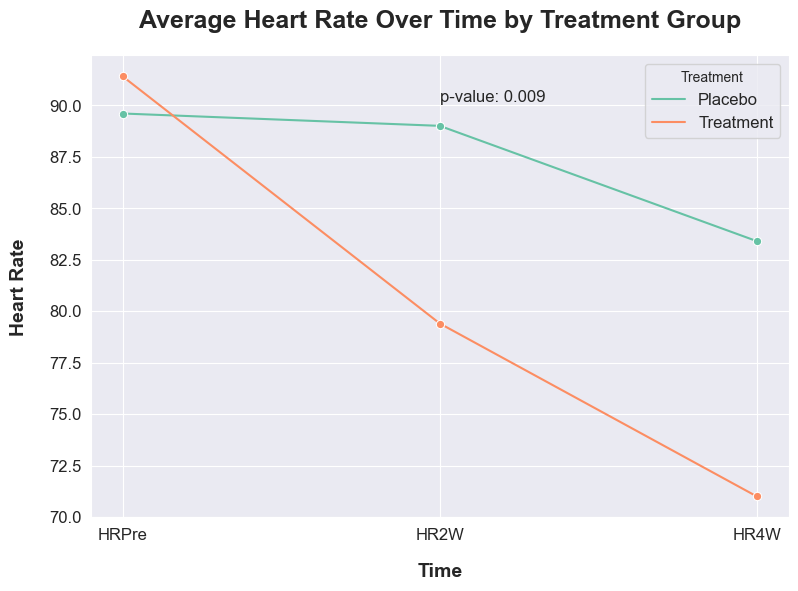

In [37]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Calculate the average heart rate for each treatment group and measurement time
hr_df = df.groupby(['Treatment']).agg({
    'HRPre': 'mean',
    'HR2W': 'mean',
    'HR4W': 'mean'
}).reset_index()

hr_df['Treatment'] = hr_df['Treatment'].replace({0: 'Placebo', 1: "Treatment"})

# Perform a t-test on HR2W
placebo = df[df['Treatment'] == 0]
experimental = df[df['Treatment'] == 1]
t_stat, p_value = stats.ttest_ind(placebo['HR2W'], experimental['HR2W'])
print(f"HR2W t-statistic: {t_stat}, p-value: {p_value:.3f}")

# Melt the dataframe to create a "long" format for seaborn
hr_melted = hr_df.melt(id_vars='Treatment', var_name='Time', value_name='Heart Rate')

# create the plot
sns.set_style('darkgrid')
sns.set_palette('Set2')
fig, ax = plt.subplots(figsize=(9, 6))
sns.lineplot(data=hr_melted, x='Time', y='Heart Rate', hue='Treatment', marker='o', ax=ax)

# set the title font size
ax.set_title('Average Heart Rate Over Time by Treatment Group', fontsize=18, fontweight='bold', pad=20)

# set the x and y axis labels and font size
ax.set_xlabel('Time', fontsize=14,fontweight='bold', labelpad=15)
ax.set_ylabel('Heart Rate', fontsize=14, fontweight='bold', labelpad=15)

# set the legend title and font size
ax.legend(title='Treatment', fontsize=12)

# set the tick label font size
ax.tick_params(axis='both', which='major', labelsize=12)

# Add p-value to the plot
ax.annotate(f"p-value: {p_value:.3f}", xy=(0.5, 0.9), xycoords='axes fraction', fontsize=12)

plt.show()


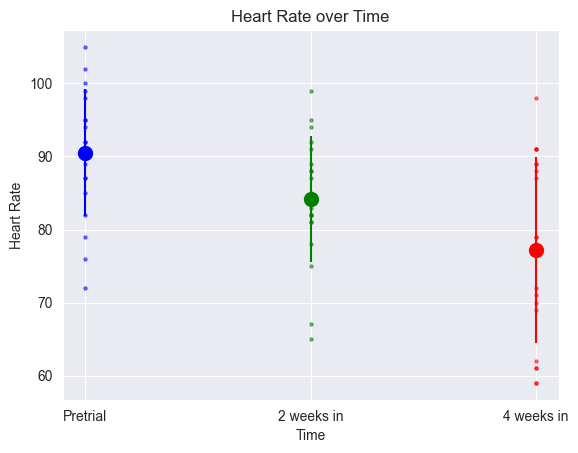

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# extract the relevant columns
time_points = ['Pretrial', '2 weeks in', '4 weeks in']
hr_columns = ['HRPre', 'HR2W', 'HR4W']
colors = ['blue', 'green', 'red']

# create the plot for each time point
fig, ax = plt.subplots()
for i, hr_col in enumerate(hr_columns):
    hr = df[hr_col]
    hr_mean = hr.mean()
    hr_std = hr.std()
    ax.plot([i], [hr_mean], marker='o', markersize=10, color=colors[i])
    ax.errorbar([i], [hr_mean], yerr=[hr_std], fmt='none', ecolor=colors[i])
    ax.scatter([i] * len(hr), hr, color=colors[i], alpha=0.5, s=5)

# set the axis labels and title
ax.set_xticks(range(len(time_points)))
ax.set_xticklabels(time_points)
ax.set_xlabel('Time')
ax.set_ylabel('Heart Rate')
ax.set_title('Heart Rate over Time')

plt.show()


Mean heart rate for Pretrial in Treatment group 0: 89.60
Mean heart rate for Pretrial in Treatment group 1: 91.40
Mean heart rate for 2 weeks in in Treatment group 0: 89.00
Mean heart rate for 2 weeks in in Treatment group 1: 79.40
Mean heart rate for 4 weeks in in Treatment group 0: 83.40
Mean heart rate for 4 weeks in in Treatment group 1: 71.00


KeyError: 'Time'

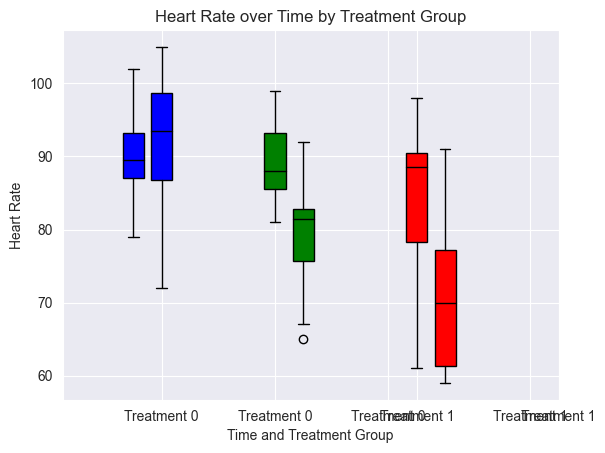

In [39]:
# extract the relevant columns
time_points = ['Pretrial', '2 weeks in', '4 weeks in']
hr_columns = ['HRPre', 'HR2W', 'HR4W']
treatment_groups = np.unique(df['Treatment'])
colors = ['blue', 'green', 'red']

# create the plot for each time point and treatment group
fig, ax = plt.subplots()
for i, hr_col in enumerate(hr_columns):
    hr_data = []
    for j, treatment in enumerate(treatment_groups):
        hr = df[df['Treatment'] == treatment][hr_col]
        hr_data.append(hr)
        mean_hr = np.mean(hr)
        print(f'Mean heart rate for {time_points[i]} in Treatment group {treatment}: {mean_hr:.2f}')
    positions = [i + j*0.2 for j in range(len(treatment_groups))]
    ax.boxplot(hr_data, positions=positions, widths=0.15, patch_artist=True, 
               boxprops=dict(facecolor=colors[i], color='black'), whiskerprops=dict(color='black'),
               capprops=dict(color='black'), medianprops=dict(color='black'))

# set the axis labels and title
ax.set_xticks([0.2, 1, 1.8, 2, 2.8, 3])
ax.set_xticklabels([f'Treatment {t}' for t in treatment_groups for _ in range(len(time_points))])
ax.set_xlabel('Time and Treatment Group')
ax.set_ylabel('Heart Rate')
ax.set_title('Heart Rate over Time by Treatment Group')

# perform t-test to compare mean heart rate between treatment groups
p_values = []
for i, hr_col in enumerate(hr_columns):
    for j in range(len(treatment_groups)):
        hr1 = df[(df['Treatment'] == treatment_groups[j]) & (df['Time'] == i+1)][hr_col]
        hr2 = df[(df['Treatment'] == treatment_groups[1-j]) & (df['Time'] == i+1)][hr_col]
        _, p = ttest_ind(hr1, hr2, equal_var=False)
        p_values.append(p)
        print(f'T-test p-value for {time_points[i]} between Treatment groups {treatment_groups[j]} and {treatment_groups[1-j]}: {p:.3f}')

plt.show()

Mean heart rate for time point 1 in Treatment group 0: nan
Mean heart rate for time point 1 in Treatment group 1: nan
Mean heart rate for time point 2 in Treatment group 0: nan
Mean heart rate for time point 2 in Treatment group 1: nan
Mean heart rate for time point 3 in Treatment group 0: 83.40
Mean heart rate for time point 3 in Treatment group 1: 71.00
T-test p-value for time point 1 between Treatment groups 0 and 1: nan
T-test p-value for time point 1 between Treatment groups 1 and 0: nan
T-test p-value for time point 2 between Treatment groups 0 and 1: nan
T-test p-value for time point 2 between Treatment groups 1 and 0: nan
T-test p-value for time point 3 between Treatment groups 0 and 1: 0.026
T-test p-value for time point 3 between Treatment groups 1 and 0: 0.026


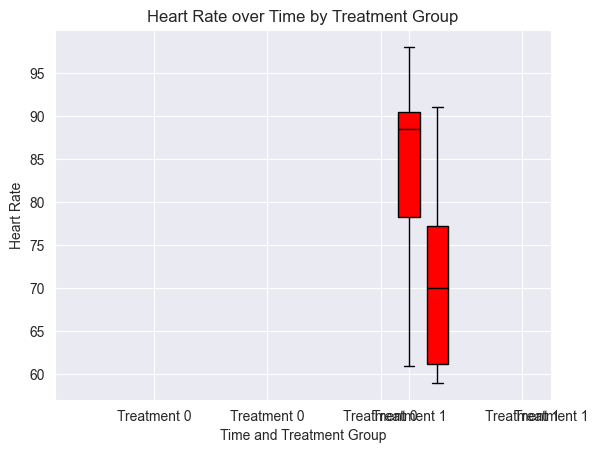

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# extract the relevant columns
hr_columns = ['HRPre', 'HR2W', 'HR4W']
treatment_groups = np.unique(df['Treatment'])
colors = ['blue', 'green', 'red']

# create a new column for the time point
df['Time'] = 0
for i, hr_col in enumerate(hr_columns):
    df.loc[df[hr_col].notnull(), 'Time'] = i + 1

# create the plot for each time point and treatment group
fig, ax = plt.subplots()
for i, hr_col in enumerate(hr_columns):
    hr_data = []
    for j, treatment in enumerate(treatment_groups):
        hr = df[(df['Treatment'] == treatment) & (df['Time'] == i+1)][hr_col]
        hr_data.append(hr)
        mean_hr = np.mean(hr)
        print(f'Mean heart rate for time point {i+1} in Treatment group {treatment}: {mean_hr:.2f}')
    positions = [i + j*0.2 for j in range(len(treatment_groups))]
    ax.boxplot(hr_data, positions=positions, widths=0.15, patch_artist=True, 
               boxprops=dict(facecolor=colors[i], color='black'), whiskerprops=dict(color='black'),
               capprops=dict(color='black'), medianprops=dict(color='black'))

# set the axis labels and title
ax.set_xticks([0.2, 1, 1.8, 2, 2.8, 3])
ax.set_xticklabels([f'Treatment {t}' for t in treatment_groups for _ in range(len(hr_columns))])
ax.set_xlabel('Time and Treatment Group')
ax.set_ylabel('Heart Rate')
ax.set_title('Heart Rate over Time by Treatment Group')

# perform t-test to compare mean heart rate between treatment groups
p_values = []
for i, hr_col in enumerate(hr_columns):
    for j in range(len(treatment_groups)):
        hr1 = df[(df['Treatment'] == treatment_groups[j]) & (df['Time'] == i+1)][hr_col]
        hr2 = df[(df['Treatment'] == treatment_groups[1-j]) & (df['Time'] == i+1)][hr_col]
        _, p = ttest_ind(hr1, hr2, equal_var=False)
        p_values.append(p)
        print(f'T-test p-value for time point {i+1} between Treatment groups {treatment_groups[j]} and {treatment_groups[1-j]}: {p:.3f}')

plt.show()


Mean heart rate for HRPre in Treatment group 1: 91.40
Mean heart rate for HRPre in Treatment group 2: nan
Mean heart rate for HR2W in Treatment group 1: 79.40
Mean heart rate for HR2W in Treatment group 2: nan
Mean heart rate for HR4W in Treatment group 1: 71.00
Mean heart rate for HR4W in Treatment group 2: nan
T-test p-value for HRPre vs HR2W in Treatment group 1: 0.013
T-test p-value for HR2W vs HR4W in Treatment group 1: 0.082


IndexError: list index out of range

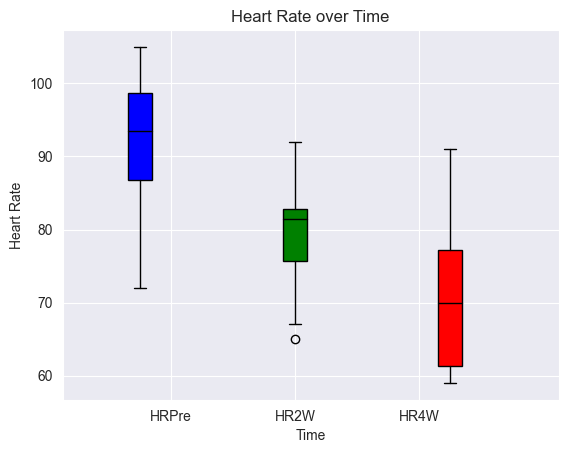

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind


# extract the relevant columns
hr_columns = ['HRPre', 'HR2W', 'HR4W']
colors = ['blue', 'green', 'red']

# create the plot for each time point
fig, ax = plt.subplots()
for i, hr_col in enumerate(hr_columns):
    hr_data = []
    for j in range(len(df['Treatment'].unique())):
        hr = df[(df['Treatment'] == j+1) & (df[hr_col].notnull())][hr_col]
        hr_data.append(hr)
        mean_hr = np.mean(hr)
        print(f'Mean heart rate for {hr_col} in Treatment group {j+1}: {mean_hr:.2f}')
    positions = [i + j*0.2 for j in range(len(df['Treatment'].unique()))]
    ax.boxplot(hr_data, positions=positions, widths=0.15, patch_artist=True, 
               boxprops=dict(facecolor=colors[i], color='black'), whiskerprops=dict(color='black'),
               capprops=dict(color='black'), medianprops=dict(color='black'))

# set the axis labels and title
ax.set_xticks([0.2, 1, 1.8])
ax.set_xticklabels(hr_columns)
ax.set_xlabel('Time')
ax.set_ylabel('Heart Rate')
ax.set_title('Heart Rate over Time')

# perform t-test to compare mean heart rate between time points
p_values = []
for i in range(len(df['Treatment'].unique())):
    for j in range(len(hr_columns)):
        hr1 = df[(df['Treatment'] == i+1) & (df[hr_columns[j]].notnull())][hr_columns[j]]
        hr2 = df[(df['Treatment'] == i+1) & (df[hr_columns[j+1]].notnull())][hr_columns[j+1]]
        _, p = ttest_ind(hr1, hr2, equal_var=False)
        p_values.append(p)
        print(f'T-test p-value for {hr_columns[j]} vs {hr_columns[j+1]} in Treatment group {i+1}: {p:.3f}')

plt.show()


In [ ]:
import scikit_posthocs as sp

df['Treatment'] = df['Treatment'].replace({0: 'Placebo', 1: "Treatment"})

post_hoc = sp.posthoc_conover(df, val_col='HR2W', group_col='Treatment', \
                              p_adjust = 'holm')
post_hoc

,Placebo,Treatment
Placebo,1.000000,0.012462
Treatment,0.012462,1.000000


/var/folders/qm/qx46fb850rlbh6q98fgw87lw0000gn/T/ipykernel_43316/2154256608.py:35: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


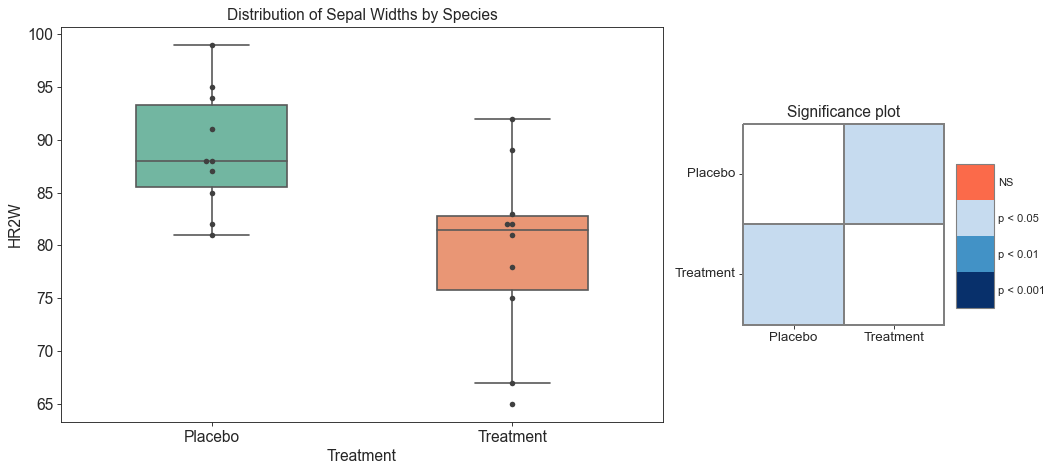

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns
sns.set_style("ticks")

plt.figure(figsize=(12, 6), dpi=80)
gs  = gridspec.GridSpec(1, 2, width_ratios=[3, 1])

# boxplot
ax0 = plt.subplot(gs[0])
ax0 = sns.boxplot(x='Treatment', y='HR2W', data=df, showfliers=False, width=0.5)
ax0 = sns.swarmplot(x='Treatment', y='HR2W', data=df, color=".25")
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xlabel('Treatment', fontsize=14)
plt.ylabel('HR2W', fontsize=14)
plt.title(f'Distribution of Sepal Widths by Species', fontsize=14)

# significance plot
ax1 = plt.subplot(gs[1])

heatmap_args = {'cmap': ['1', '#fb6a4a',  '#08306b',  '#4292c6', '#c6dbef'], 
                'linewidths': 0.25, 
                'linecolor': '0.5', 
                'clip_on': False, 
                'square': True, 
                'cbar_ax_bbox': [1, 0.35, 0.04, 0.3],
               }

_ = sp.sign_plot(post_hoc, **heatmap_args)

ax1.set_title('Significance plot', fontsize=14)
ax1.set_yticklabels(ax0.get_xticklabels(), rotation=0, fontsize=12)
ax1.set_xticklabels(ax0.get_xticklabels(), rotation=0, fontsize=12)
plt.tight_layout()
plt.savefig('boxplot-with-significance-plot.png', dpi=80, bbox_inches = 'tight')
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import scikit_posthocs as sp

def boxplot_with_significance_plot(x, y, data, post_hoc):
    plt.figure(figsize=(12, 6), dpi=80)
    gs  = gridspec.GridSpec(1, 2, width_ratios=[3, 1])

    # boxplot
    ax0 = plt.subplot(gs[0])
    ax0 = sns.boxplot(x=x, y=y, data=data, showfliers=False, width=0.5)
    ax0 = sns.swarmplot(x=x, y=y, data=data, color=".25")
    plt.yticks(fontsize=14)
    plt.xticks(fontsize=14)
    plt.xlabel(x, fontsize=14)
    plt.ylabel(y, fontsize=14)
    plt.title(f'Distribution of {y} by {x}', fontsize=14)

    # significance plot
    ax1 = plt.subplot(gs[1])

    heatmap_args = {'cmap': ['1', '#fb6a4a',  '#08306b',  '#4292c6', '#c6dbef'], 
                    'linewidths': 0.25, 
                    'linecolor': '0.5', 
                    'clip_on': False, 
                    'square': True, 
                    'cbar_ax_bbox': [1, 0.35, 0.04, 0.3],
                   }

    _ = sp.sign_plot(post_hoc, **heatmap_args)

    ax1.set_title('Significance plot', fontsize=14)
    ax1.set_yticklabels(ax0.get_xticklabels(), rotation=0, fontsize=12)
    ax1.set_xticklabels(ax0.get_xticklabels(), rotation=0, fontsize=12)
    plt.tight_layout()
    plt.show()


/var/folders/qm/qx46fb850rlbh6q98fgw87lw0000gn/T/ipykernel_43316/209490185.py:36: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


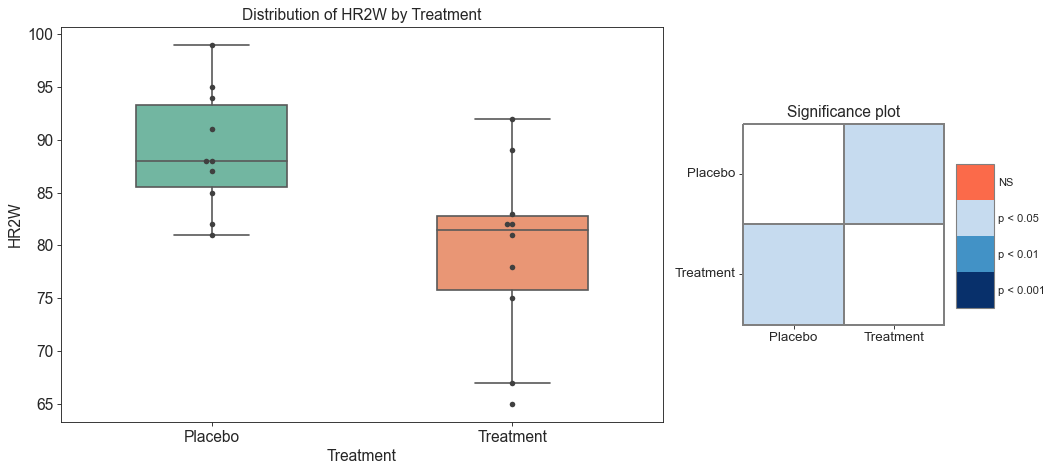

In [ ]:
boxplot_with_significance_plot('Treatment', 'HR2W', df, post_hoc)


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

def plot_heart_rate_by_treatment(df, treatment_col, time_col, hr_col):
    # Calculate the average heart rate for each treatment group and measurement time
    hr_df = df.groupby([treatment_col]).agg({
        time_col + '1': 'mean',
        time_col + '2': 'mean',
        time_col + '3': 'mean'
    }).reset_index()

    hr_df[treatment_col] = hr_df[treatment_col].replace({0: 'Placebo', 1: "Treatment"})

    # Perform t-tests on each time period
    for i in range(1, 4):
        t_stat, p_value = stats.ttest_ind(df[(df[treatment_col] == 0)][hr_col + str(i)], df[(df[treatment_col] == 1)][hr_col + str(i)])
        print(f"{time_col}{i} t-statistic: {t_stat}, p-value: {p_value}")

    # Melt the dataframe to create a "long" format for seaborn
    hr_melted = hr_df.melt(id_vars=treatment_col, var_name='Time', value_name='Heart Rate')

    # create the plot
    sns.set_style('darkgrid')
    sns.set_palette('Set2')
    fig, ax = plt.subplots(figsize=(9, 6))
    sns.lineplot(data=hr_melted, x='Time', y='Heart Rate', hue=treatment_col, marker='o', ax=ax)

    # set the title font size
    ax.set_title('Average Heart Rate Over Time by Treatment Group', fontsize=18, fontweight='bold', pad=20)

    # set the x and y axis labels and font size
    ax.set_xlabel('Time', fontsize=14, fontweight='bold', labelpad=15)
    ax.set_ylabel('Heart Rate', fontsize=14, fontweight='bold', labelpad=15)

    # set the legend title and font size
    ax.legend(title='Treatment', fontsize=12)

    # set the tick label font size
    ax.tick_params(axis='both', which='major', labelsize=12)

    plt.show()


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

def plot_measurements_over_time(df, columns, treatment_column='Treatment', treatment_labels=['Placebo', 'Treatment']):
    # Calculate the average measurement for each treatment group and measurement time
    measurement_df = df.groupby([treatment_column]).agg({
        columns[0]: 'mean',
        columns[1]: 'mean',
        columns[2]: 'mean'
    }).reset_index()

    measurement_df[treatment_column] = measurement_df[treatment_column].replace({0: treatment_labels[0], 1: treatment_labels[1]})

    # Display the new dataframe
    print(measurement_df)

    # Perform a t-test on the second measurement time
    t_stat, p_value = stats.ttest_ind(df[(df[treatment_column] == 0)][columns[1]], df[(df[treatment_column] == 1)][columns[1]])
    print(f"{columns[1]} t-statistic: {t_stat}, p-value: {p_value}")

    # Perform a t-test on the third measurement time
    t_stat, p_value = stats.ttest_ind(df[(df[treatment_column] == 0)][columns[2]], df[(df[treatment_column] == 1)][columns[2]])
    print(f"{columns[2]} t-statistic: {t_stat}, p-value: {p_value}")

    # Melt the dataframe to create a "long" format for seaborn
    measurement_melted = measurement_df.melt(id_vars=treatment_column, var_name='Time', value_name='Measurement')

    # create the plot
    sns.set_style('darkgrid')
    sns.set_palette('Set2')
    fig, ax = plt.subplots(figsize=(9, 6))
    sns.lineplot(data=measurement_melted, x='Time', y='Measurement', hue=treatment_column, marker='o', ax=ax)

    # set the title font size
    ax.set_title(f'Average {columns[0]} Over Time by Treatment Group', fontsize=18, fontweight='bold', pad=20)

    # set the x and y axis labels and font size
    ax.set_xlabel('Measurement Time', fontsize=14, fontweight='bold', labelpad=15)
    ax.set_ylabel(columns[0], fontsize=14, fontweight='bold', labelpad=15)

    # set the legend title and font size
    ax.legend(title=treatment_column, fontsize=12)

    # set the tick label font size
    ax.tick_params(axis='both', which='major', labelsize=12)

    plt.show()



   Treatment  AdjPreLVSize  AdjLVSize2W  AdjLVSize4W
0    Placebo          6.61         6.55         6.47
1  Treatment          6.58         6.09         5.35
AdjLVSize2W t-statistic: nan, p-value: nan
AdjLVSize4W t-statistic: nan, p-value: nan


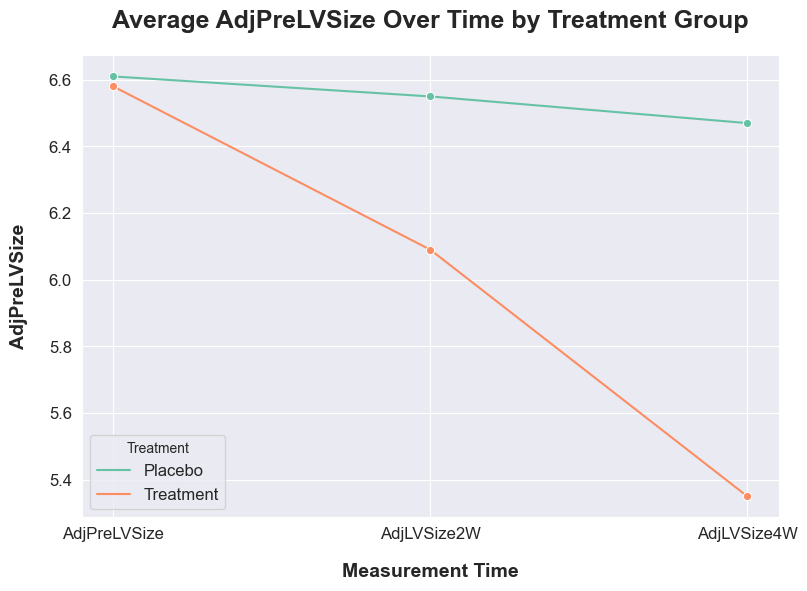

In [ ]:
plot_measurements_over_time(df, ['AdjPreLVSize', 'AdjLVSize2W', 'AdjLVSize4W'])


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

class SymptomPlot:
    def __init__(self, data, treatment_col, time_cols, symptom_cols):
        self.data = data
        self.treatment_col = treatment_col
        self.time_cols = time_cols
        self.symptom_cols = symptom_cols

    def _get_treatment_name(self, treatment):
        if treatment == 0:
            return "Placebo"
        else:
            return "Treatment"

    def plot(self):
        dfs = []
        for time_col in self.time_cols:
            df = self.data.groupby([self.treatment_col]).agg({time_col: 'mean'}).reset_index()
            df[self.treatment_col] = df[self.treatment_col].apply(self._get_treatment_name)
            df = df.melt(id_vars=self.treatment_col, var_name='Time', value_name='Symptom')
            df['Time'] = time_col
            dfs.append(df)

        plot_data = pd.concat(dfs, axis=0)
        sns.set_style('darkgrid')
        sns.set_palette('Set2')
        fig, ax = plt.subplots(figsize=(9, 6))
        sns.lineplot(data=plot_data, x='Time', y='Symptom', hue=self.treatment_col, marker='o', ax=ax)
        ax.set_title('Average Symptom Over Time by Treatment Group', fontsize=18, fontweight='bold', pad=20)
        ax.set_xlabel('Time', fontsize=14,fontweight='bold', labelpad=15)
        ax.set_ylabel('Symptom', fontsize=14, fontweight='bold', labelpad=15)
        ax.legend(title='Treatment', fontsize=12)
        ax.tick_params(axis='both', which='major', labelsize=12)

        plt.show()


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

class LinePlot:
    def __init__(self, data, x_col, y_col, hue_col=None, hue_dict=None, title=None, x_label=None, y_label=None, legend_title=None):
        self.data = data
        self.x_col = x_col
        self.y_col = y_col
        self.hue_col = hue_col
        self.hue_dict = hue_dict
        self.title = title
        self.x_label = x_label
        self.y_label = y_label
        self.legend_title = legend_title

    def _calculate_ttest(self, df, col1, col2):
        t_stat, p_value = stats.ttest_ind(df[df[self.hue_col] == self.hue_dict[0]][col1],
                                          df[df[self.hue_col] == self.hue_dict[1]][col2])
        print(f"{col1} vs {col2} t-statistic: {t_stat}, p-value: {p_value}")

    def plot(self):
        # Melt the dataframe to create a "long" format for seaborn
        melted_df = self.data.melt(id_vars=self.hue_col, var_name=self.x_col, value_name=self.y_col)

        # create the plot
        sns.set_style('darkgrid')
        sns.set_palette('Set2')
        fig, ax = plt.subplots(figsize=(9, 6))
        sns.lineplot(data=melted_df, x=self.x_col, y=self.y_col, hue=self.hue_col, marker='o', ax=ax)

        # set the title font size
        if self.title:
            ax.set_title(self.title, fontsize=18, fontweight='bold', pad=20)

        # set the x and y axis labels and font size
        if self.x_label:
            ax.set_xlabel(self.x_label, fontsize=14, fontweight='bold', labelpad=15)

        if self.y_label:
            ax.set_ylabel(self.y_label, fontsize=14, fontweight='bold', labelpad=15)

        # set the legend title and font size
        if self.legend_title:
            ax.legend(title=self.legend_title, fontsize=12)

        # calculate t-test if hue_col and hue_dict are provided
        if self.hue_col and self.hue_dict:
            for i in range(1, 4):
                col1 = f"{self.y_col}Pre"
                col2 = f"{self.y_col}{i}W"
                self._calculate_ttest(self.data, col1, col2)

        # set the tick label font size
        ax.tick_params(axis='both', which='major', labelsize=12)

        plt.show()


ValueError: Unable to parse string "Dead" at position 80

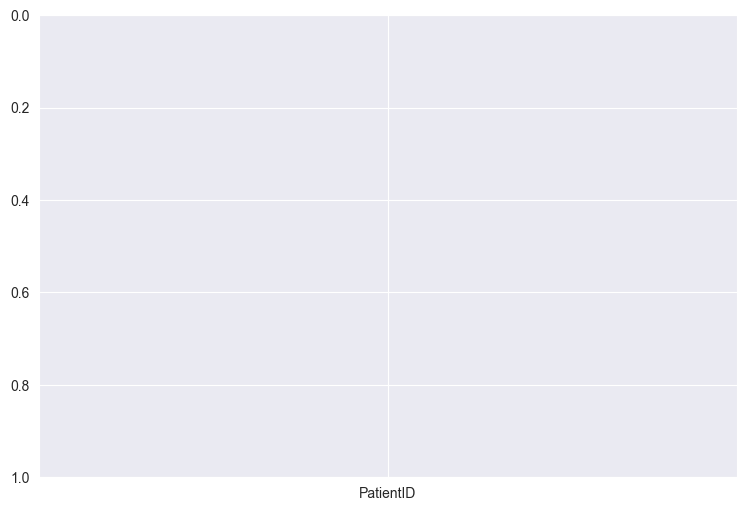

In [ ]:
line_plot = LinePlot(data=df, x_col='Time', y_col='AdjLVSize', hue_col='Treatment', hue_dict={0: 'Placebo', 1: 'Experimental'}, title='Average Left Ventricular Size Over Time by Treatment Group', x_label='Time', y_label='Left Ventricular Size', legend_title='Treatment')
line_plot.plot()


In [ ]:
def plot_measurements_over_time(df, columns, treatment_column='Treatment', treatment_labels=['Placebo', 'Treatment']):
    # Calculate the average measurement for each treatment group and measurement time
    measurement_df = df.groupby([treatment_column]).agg({
        columns[0]: 'mean',
        columns[1]: 'mean',
        columns[2]: 'mean'
    }).reset_index()

    measurement_df[treatment_column] = measurement_df[treatment_column].replace({0: treatment_labels[0], 1: treatment_labels[1]})

    # Display the new dataframe
    print(measurement_df)

    # Perform a t-test on the second measurement time
    t_stat, p_value = stats.ttest_ind(df[(df[treatment_column] == 0)][columns[1]], df[(df[treatment_column] == 1)][columns[1]])
    print(f"{columns[1]} t-statistic: {t_stat}, p-value: {p_value}")

    # Perform a t-test on the third measurement time
    t_stat, p_value = stats.ttest_ind(df[(df[treatment_column] == 0)][columns[2]], df[(df[treatment_column] == 1)][columns[2]])
    print(f"{columns[2]} t-statistic: {t_stat}, p-value: {p_value}")

    # Melt the dataframe to create a "long" format for seaborn
    measurement_melted = measurement_df.melt(id_vars=treatment_column, var_name='Time', value_name='Measurement')

    # create the plot
    sns.set_style('darkgrid')
    sns.set_palette('Set2')
    fig, ax = plt.subplots(figsize=(9, 6))
    sns.lineplot(data=measurement_melted, x='Time', y='Measurement', hue=treatment_column, marker='o', ax=ax)

    # set the title font size
    ax.set_title(f'Average {columns[0]} Over Time by Treatment Group', fontsize=18, fontweight='bold', pad=20)

    # set the x and y axis labels and font size
    ax.set_xlabel('Measurement Time', fontsize=14, fontweight='bold', labelpad=15)
    ax.set_ylabel(columns[0], fontsize=14, fontweight='bold', labelpad=15)

    # set the legend title and font size
    ax.legend(title=treatment_column, fontsize=12)

    # set the tick label font size
    ax.tick_params(axis='both', which='major', labelsize=12)

    plt.show()

In [44]:
# Perform a t-test on HR4W
placebo = df.loc[df['Treatment'] == 0]
experimental = df.loc[df['Treatment'] == 1]
t_stat, p_value = stats.ttest_ind(placebo['QoLPre'], experimental['QoLPre'])
print(f"AdjPreLVSize t-statistic: {round(t_stat, 3)}, p-value: {round(p_value, 5)}")



AdjPreLVSize t-statistic: -0.828, p-value: 0.41872
